In [ ]:
import torch
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.io as sio

In [ ]:
class Dataset():
    def __init__(self, root_dir, data_dir, labels_path):
        self.root_dir = root_dir
        self.data_dir = data_dir
        self.labels_path = labels_path
        self.data, self.labels = self.build_dataset()
        self.data = self.normalize(self.data)
        # self.length = self.dataset.shape[1]
        # self.minmax_normalize()
        # 'N', 'A', 'O', '~'
        self.class_names = {'N': 'Normal', 'A': 'AF', 'O': 'Other rhythm', '~': "Noisy"}

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        step = self.dataset[:, idx]
        step = torch.unsqueeze(step, 0)
        # target = self.label[idx]
        target = 0  # only one class
        return step, target

    def build_dataset(self):
        '''get dataset of signal'''
        data = []
        labels = []
        targets = pd.read_csv(self.root_dir+self.labels_path, names=["label"])
        data_path = Path(self.root_dir+self.data_dir)
        files = sorted([f for f in data_path.glob("*.mat")])
        for f in files:
            sample = sio.loadmat(f)
            data.append(sample['val'][0])
            label = targets.loc[f.name.split('.')[0]]['label']
            labels.append(label)
        

        return (data, labels)
            
    
    def __remove_dc_component(self,ecg):
        mean = np.mean(ecg)
        # cancel DC components
        return ecg - mean


    def max_normalization(self,ecg):
        return ecg / max(np.fabs(np.amin(ecg)), np.fabs(np.amax(ecg)))

    def normalize(self, ecg):
        """
        Normalizes to a range of [-1; 1]
        :param ecg: input signal
        :return: normalized signal
        """
        ecg = self.__remove_dc_component(ecg)
        ecg = self.max_normalization(ecg)
        return ecg


In [ ]:
dataset = Dataset('../data/', 'training2017', 'REFERENCE-v3.csv')

/Users/koffi_anderson/opt/anaconda3/envs/aml/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: operands could not be broadcast together with shapes (9000,) (18000,) 

In [ ]:
dataset.data, dataset.labels

([array([-127, -162, -197, ...,  -18,  -22,  -21], dtype=int16),
  array([128, 157, 189, ...,   0,   1,   2], dtype=int16),
  array([ 56,  73,  85, ..., -64, -36, -20], dtype=int16),
  array([519, 619, 723, ..., 116,  17,  18], dtype=int16),
  array([-188, -239, -274, ...,  -93,  -57,    0], dtype=int16),
  array([-266, -316, -367, ...,   51,   34,   21], dtype=int16),
  array([ 21,  22,  24, ..., 236, 174,  84], dtype=int16),
  array([-187, -236, -286, ...,  -98,  -33,   19], dtype=int16),
  array([ 51,  56,  59, ..., -80, -69, -62], dtype=int16),
  array([-1028, -1225, -1418, ...,    10,     9,     9], dtype=int16),
  array([ -69,  -89, -108, ...,   96,   79,   62], dtype=int16),
  array([ 72,  88, 103, ...,  20,  20,  20], dtype=int16),
  array([-20, -27, -33, ..., -16, -22, -26], dtype=int16),
  array([-62, -72, -81, ..., -70, -66, -62], dtype=int16),
  array([ 76, 101, 127, ..., 134,  52, -33], dtype=int16),
  array([ -81,  -96, -107, ..., -150, -121,  -87], dtype=int16),
  array(

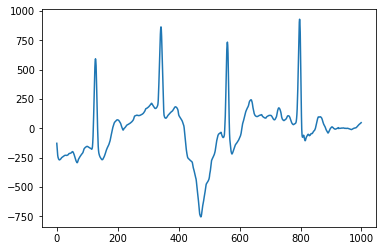

In [ ]:
plt.plot(dataset.data[0][0:1000])

In [ ]:
targets = pd.read_csv("../data/REFERENCE-v3.csv", index_col=0, names=["label"])

In [ ]:
classes = targets["label"].unique().tolist()
classes

['N', 'A', 'O', '~']

In [ ]:
targets.loc['A00001']

label    N
Name: A00001, dtype: object